In [2]:
from pandas import read_csv

In [55]:
data_raw = read_csv('FF_20220829_1700.csv')

In [64]:
data_raw.iloc[0]

GENER_DESC                                                CROWN
MMTGEN        NATIONAL PARKS ACT AND NATURE CONSERVATION RES...
AREA_HA                                              128.440577
mer_plm_de                                   Parks and Reserves
REG_NAME                                                    NaN
bioregion                                                   NaN
gridcode                                                      0
FF_Des                                               Non Forest
Name: 0, dtype: object

In [56]:
data_raw.gridcode.value_counts()

0    81406
1    27739
3    21178
2    16408
5    12111
4     7429
Name: gridcode, dtype: int64

In [4]:
data = read_csv('table_plot_data.csv', low_memory=False)

In [6]:
# add gridcode labels
# Grid code 1 - Patch | 2 - Transitional | 3 - Perforated | 4 - Edge | 5 - Interior | 0=nonforest
data['frag_category'] = ''
data.loc[data.gridcode == 1, 'frag_category'] = 'Patch'
data.loc[data.gridcode == 2, 'frag_category'] = 'Transitional'
data.loc[data.gridcode == 3, 'frag_category'] = 'Perforated'
data.loc[data.gridcode == 4, 'frag_category'] = 'Edge'
data.loc[data.gridcode == 5, 'frag_category'] = 'Interior'
data.loc[data.gridcode == 0, 'frag_category'] = 'Non Forest'

In [ ]:
# add 'Non Forest' data back in.

In [7]:
data.head()

,bioregion,gridcode,label,local_area,local_area_pct,sum_area,frag_category
0,NARACOORTE COASTAL PLAIN,1,Parks & Reserves,1155.981746,0.019650,58828.349181,Patch
1,NARACOORTE COASTAL PLAIN,2,Parks & Reserves,2687.541198,0.045684,58828.349181,Transitional
2,NARACOORTE COASTAL PLAIN,3,Parks & Reserves,28462.054061,0.483815,58828.349181,Perforated
3,NARACOORTE COASTAL PLAIN,4,Parks & Reserves,2666.939874,0.045334,58828.349181,Edge
4,NARACOORTE COASTAL PLAIN,5,Parks & Reserves,23855.832303,0.405516,58828.349181,Interior


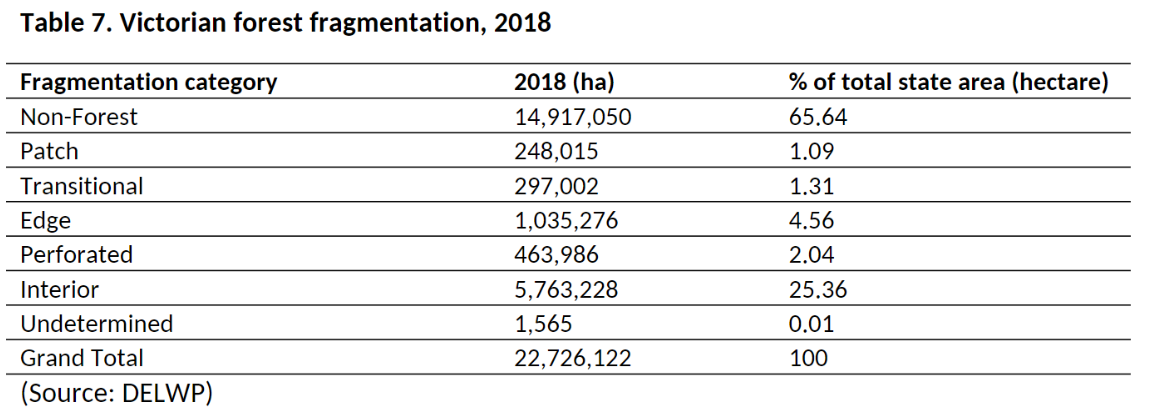


In [12]:
# previous frag_category sum
# 248015+297002+1035276+463986+5763226=7807505

# current frag_category sum
# data.local_area.sum() = 6848161.760883927

# 6848161.760883927/7807505 = 0.8771255043556075

In [9]:
data.groupby('frag_category').sum()

,gridcode,local_area,local_area_pct,sum_area
frag_category,,,,
Edge,176,1.040794e+05,0.971976,6.848162e+06
Interior,220,4.949001e+06,15.465297,6.848162e+06
Patch,44,1.021089e+05,6.363530,6.848162e+06
Perforated,132,1.538262e+06,14.217777,6.848162e+06
Transitional,88,1.547104e+05,4.981420,6.848162e+06


In [72]:
# table 7, sum (ha) by frag_category
# will need grand_total, undetermined and non-forest

grand_total = 22726122
table_name = 'f04_table7.csv'
with open(table_name, 'w') as w:
    w.writelines('Fragmentation category,Area 2023 (ha),% of total state area\n')
    
for frag_cat in data_raw.FF_Des.unique():
    sum_area = data_raw.loc[data_raw.FF_Des == frag_cat].AREA_HA.sum()
    output_line = f'{frag_cat},{sum_area:.2f},{sum_area/grand_total*100:.2f}\n'
    with open(table_name, 'a') as a:
        a.writelines(output_line)
     
with open(table_name, 'a') as a:
    a.writelines(f'Grand Total,{grand_total:.2f},100.00')

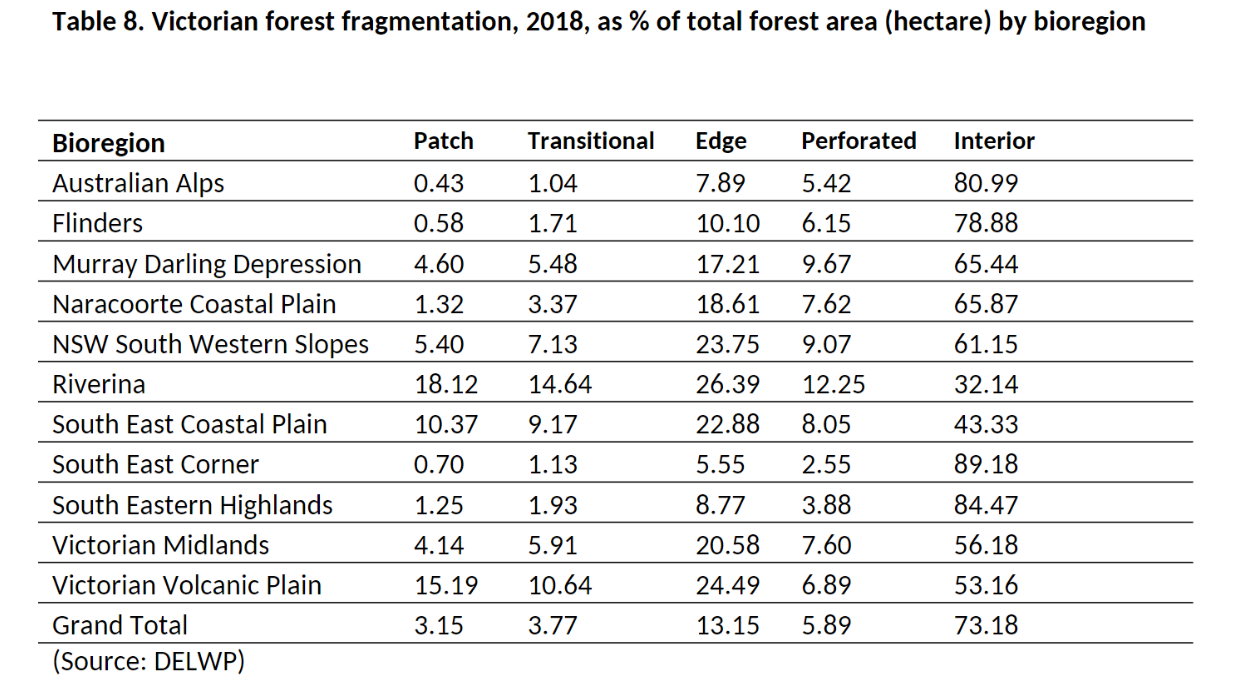


In [51]:
# forest fragmentation by bioregion as percentage of total forest area
table_name = 'f04_table8.csv'
# let's take a quick look
# data.groupby(['bioregion', 'frag_category']).sum()
# TODO: get total forest extent area in each of the BIOREGIONS 
#       MAKE JIRA TICKET and assign to SAL
frag_categories = ['Patch','Transitional','Edge','Perforated','Interior']

with open(table_name, 'w') as w:
    w.writelines('Bioregion,Patch,Transitional,Edge,Perforated,Interior\n')

for bioregion in data.bioregion.unique():
    output_line=f'{bioregion}'
    total_forest_area = data.loc[
            (data.bioregion == bioregion)
        ].local_area.sum()
    for frag_cat in frag_categories:
        local_area = data.loc[
            (data.bioregion == bioregion) &
            (data.frag_category == frag_cat)
        ].local_area.sum()
        output_line = output_line + f',{local_area/total_forest_area*100:.2f}'
    
    output_line = output_line + '\n'
    with open(table_name, 'a') as a:
        a.writelines(output_line)
        print(output_line)

output_line=f'GRAND TOTAL'
for frag_cat in frag_categories:
    total_forest_area = data.loc[
            (data.bioregion == bioregion)
        ].local_area.sum()
    local_area = data.loc[
        (data.bioregion == bioregion) &
        (data.frag_category == frag_cat)
        ].local_area.sum()
    output_line = output_line + f',{local_area/total_forest_area*100:.2f}'
        
with open(table_name, 'a') as a:
    a.writelines(output_line)
    print(output_line)   


NARACOORTE COASTAL PLAIN,1.23,3.37,4.74,50.83,39.82

VICTORIAN VOLCANIC PLAIN,3.83,4.42,1.92,38.96,50.87

VICTORIAN MIDLANDS,2.24,4.47,2.30,44.58,46.41

SOUTH EAST COASTAL PLAIN,5.37,7.24,2.80,45.61,38.98

SOUTH EASTERN HIGHLANDS,0.22,0.61,0.60,11.93,86.64

MURRAY DARLING DEPRESSION,2.73,3.87,2.31,28.76,62.32

RIVERINA,14.07,11.40,4.30,49.24,21.00

NSW SOUTH WESTERN SLOPES,2.07,4.57,1.67,43.34,48.35

FLINDERS,4.72,8.48,2.62,50.19,33.99

AUSTRALIAN ALPS,0.14,0.35,1.20,11.20,87.12

SOUTH EAST CORNER,0.18,0.43,0.92,12.40,86.08

GRAND TOTAL,0.18,0.43,0.92,12.40,86.08


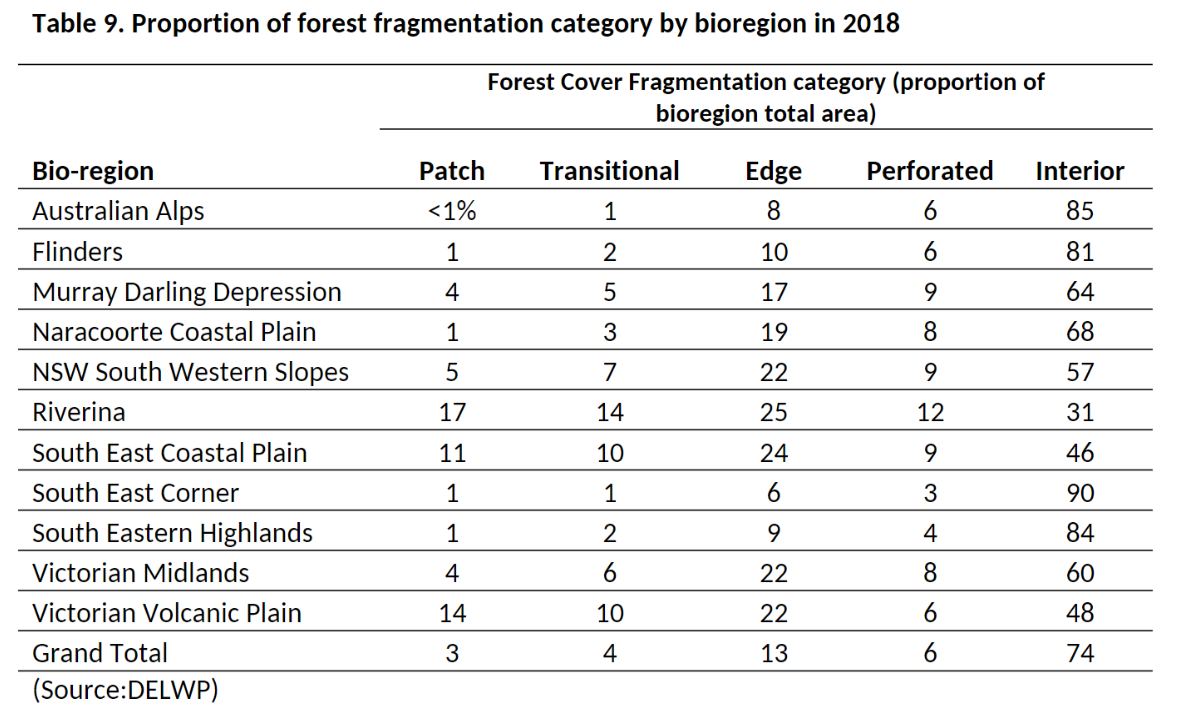

In [52]:
# get total bioregion area and divide through
# For now, I'll just do the total area
table_name = 'f04_table9_local_area_in_HA_only.csv'
frag_categories = ['Patch','Transitional','Edge','Perforated','Interior']

with open(table_name, 'w') as w:
    w.writelines('Bioregion,Patch,Transitional,Edge,Perforated,Interior\n')

for bioregion in data.bioregion.unique():
    output_line=f'{bioregion}'
    total_forest_area = data.loc[
            (data.bioregion == bioregion)
        ].local_area.sum()
    for frag_cat in frag_categories:
        local_area = data.loc[
            (data.bioregion == bioregion) &
            (data.frag_category == frag_cat)
        ].local_area.sum()
        output_line = output_line + f',{total_forest_area*100:.2f}'
    
    output_line = output_line + '\n'
    with open(table_name, 'a') as a:
        a.writelines(output_line)
        print(output_line)




NARACOORTE COASTAL PLAIN,14595720.78,14595720.78,14595720.78,14595720.78,14595720.78

VICTORIAN VOLCANIC PLAIN,5961089.41,5961089.41,5961089.41,5961089.41,5961089.41

VICTORIAN MIDLANDS,74261856.24,74261856.24,74261856.24,74261856.24,74261856.24

SOUTH EAST COASTAL PLAIN,17593585.70,17593585.70,17593585.70,17593585.70,17593585.70

SOUTH EASTERN HIGHLANDS,217142219.21,217142219.21,217142219.21,217142219.21,217142219.21

MURRAY DARLING DEPRESSION,146128545.73,146128545.73,146128545.73,146128545.73,146128545.73

RIVERINA,14724135.94,14724135.94,14724135.94,14724135.94,14724135.94

NSW SOUTH WESTERN SLOPES,11304714.29,11304714.29,11304714.29,11304714.29,11304714.29

FLINDERS,2639137.34,2639137.34,2639137.34,2639137.34,2639137.34

AUSTRALIAN ALPS,68933857.57,68933857.57,68933857.57,68933857.57,68933857.57

SOUTH EAST CORNER,111531313.88,111531313.88,111531313.88,111531313.88,111531313.88



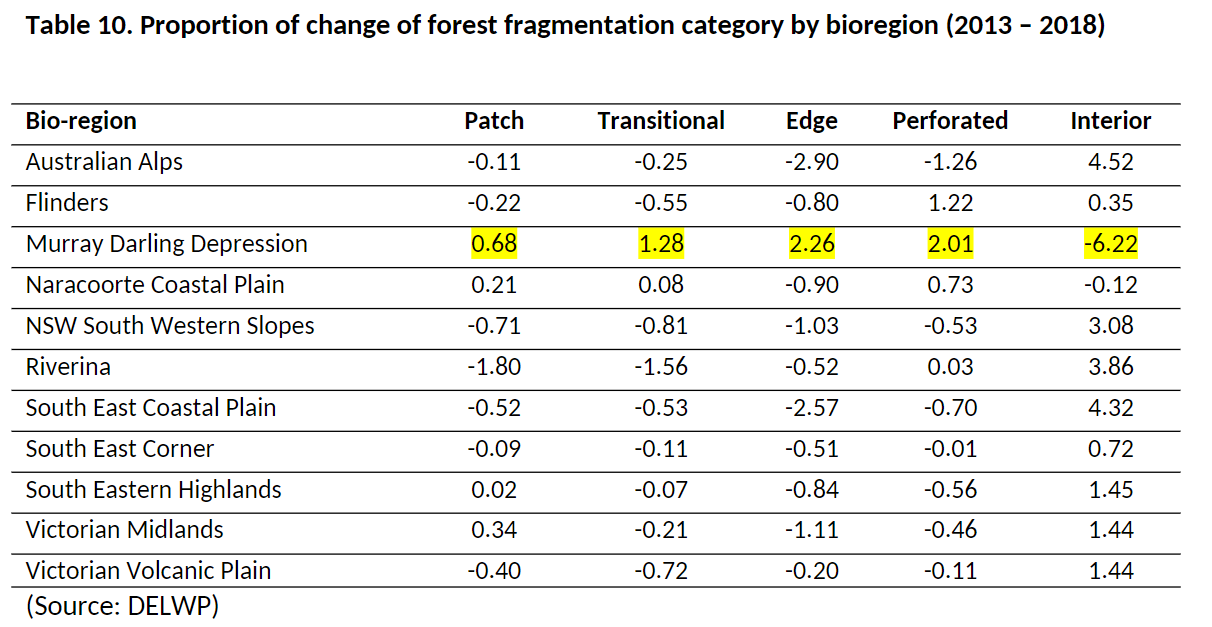

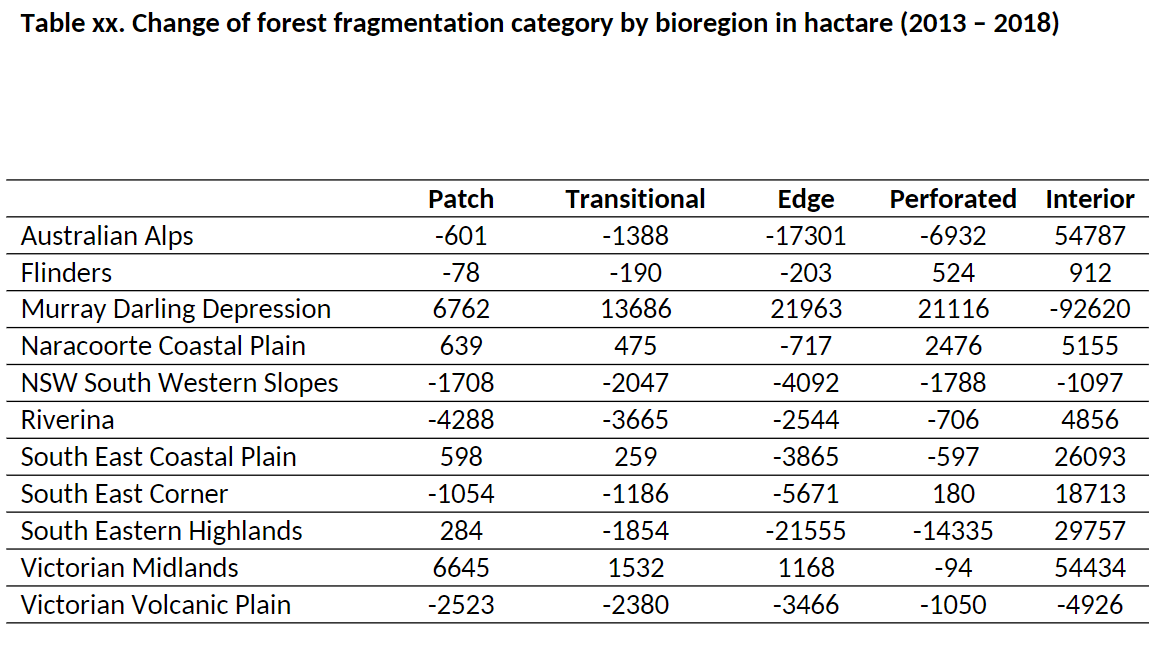

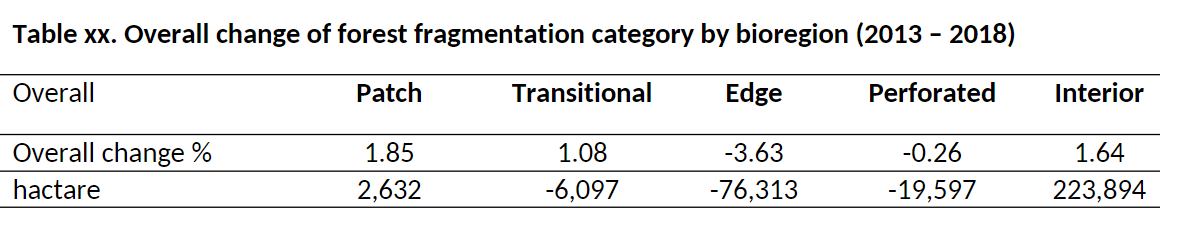